In [ ]:
# from zipfile import ZipFile
# with ZipFile( '/content/drive/MyDrive/facial_expression.zip', 'r') as data:
#   data.extractall('/content/drive/MyDrive/Extracted data set 2')





In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os


In [ ]:
os.listdir('/content/drive/MyDrive/Extracted data set 2')

['Dataset']

In [ ]:
basepath = "/content/drive/MyDrive/Extracted data set 2"

In [ ]:
os.listdir(os.path.join(basepath, 'Dataset'))

['labels.txt', 'test', 'train']

In [ ]:
test_data = os.path.join(basepath, 'Dataset', 'test')
train_data = os.path.join(basepath, 'Dataset', 'train')

In [ ]:
test_data

'/content/drive/MyDrive/Extracted data set 2/Dataset/test'

In [ ]:

train_data

'/content/drive/MyDrive/Extracted data set 2/Dataset/train'

In [ ]:
for i in os.listdir(test_data):
  print(i, len(os.listdir(os.path.join(test_data, i))))


anger 491
disgust 55
fear 528
happiness 879
neutral 626
sadness 594
surprise 416


In [ ]:
for i in os.listdir(train_data):
  print(i, len(os.listdir(os.path.join(train_data, i))))

anger 4462
disgust 493
fear 4593
happiness 8110
neutral 5572
sadness 5483
surprise 3586


In [ ]:
import cv2

In [ ]:
os.listdir(os.path.join(train_data, "disgust"))

['.jovianrc',
 '1016646.png',
 '1025485.png',
 '1042190.png',
 '1059753.png',
 '1091693.png',
 '1100485.png',
 '1112152.png',
 '1114592.png',
 '1149728.png',
 '1152342.png',
 '1156419.png',
 '1219698.png',
 '1243951.png',
 '126398.png',
 '1331222.png',
 '1338503.png',
 '1398692.png',
 '1422576.png',
 '1446780.png',
 '1481443.png',
 '1521226.png',
 '1535849.png',
 '1547001.png',
 '1552848.png',
 '1563644.png',
 '1587023.png',
 '1587137.png',
 '1596044.png',
 '1608967.png',
 '162196.png',
 '1645744.png',
 '165667.png',
 '1657912.png',
 '1661191.png',
 '1665687.png',
 '169050.png',
 '1707114.png',
 '1711254.png',
 '1720659.png',
 '1727725.png',
 '1738940.png',
 '1742975.png',
 '1773921.png',
 '1778112.png',
 '1800972.png',
 '1801207.png',
 '1805220.png',
 '181254.png',
 '1813690.png',
 '1822854.png',
 '1842914.png',
 '1863118.png',
 '1863655.png',
 '1916612.png',
 '1939182.png',
 '1962927.png',
 '1968321.png',
 '1977296.png',
 '1983890.png',
 '1985287.png',
 '199566.png',
 '2004999.png',


In [ ]:
img =cv2.imread(os.path.join(train_data, "disgust","9904809.png"))

In [ ]:
from google.colab.patches import cv2_imshow

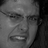

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(48, 48, 3)

In [ ]:
img.size

6912

In [ ]:
from keras.utils import  image_dataset_from_directory

In [ ]:
train_batches =image_dataset_from_directory(train_data, image_size=(48,48), batch_size=80)
test_batches =image_dataset_from_directory(test_data, image_size=(48,48), batch_size=80)

Found 32298 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [ ]:
iterater_train = train_batches.as_numpy_iterator()
interater_test = test_batches.as_numpy_iterator()

In [ ]:
batch_train = iterater_train.next()

In [ ]:
batch_train

(array([[[[ 45.,  45.,  45.],
          [ 48.,  48.,  48.],
          [ 50.,  50.,  50.],
          ...,
          [ 91.,  91.,  91.],
          [ 87.,  87.,  87.],
          [ 98.,  98.,  98.]],
 
         [[ 30.,  30.,  30.],
          [ 34.,  34.,  34.],
          [ 39.,  39.,  39.],
          ...,
          [ 82.,  82.,  82.],
          [ 80.,  80.,  80.],
          [ 85.,  85.,  85.]],
 
         [[ 13.,  13.,  13.],
          [ 16.,  16.,  16.],
          [ 17.,  17.,  17.],
          ...,
          [ 85.,  85.,  85.],
          [ 78.,  78.,  78.],
          [ 79.,  79.,  79.]],
 
         ...,
 
         [[ 14.,  14.,  14.],
          [  2.,   2.,   2.],
          [  8.,   8.,   8.],
          ...,
          [ 83.,  83.,  83.],
          [ 97.,  97.,  97.],
          [108., 108., 108.]],
 
         [[  2.,   2.,   2.],
          [  7.,   7.,   7.],
          [  7.,   7.,   7.],
          ...,
          [ 91.,  91.,  91.],
          [100., 100., 100.],
          [108., 108., 108.

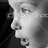

In [ ]:
cv2_imshow(batch_train[0][0])

In [ ]:
batch_train[1][0]

6

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

model= keras.models.Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history  = model.fit(train_batches, epochs= 20, validation_data= test_batches )

Epoch 1/20
404/404 [==============================] - 4721s 12s/step - loss: 1.5596 - accuracy: 0.4075 - val_loss: 1.5391 - val_accuracy: 0.4411
Epoch 2/20
404/404 [==============================] - 1070s 3s/step - loss: 1.2257 - accuracy: 0.5299 - val_loss: 1.4498 - val_accuracy: 0.4425
Epoch 3/20
404/404 [==============================] - 1078s 3s/step - loss: 1.0757 - accuracy: 0.5952 - val_loss: 1.2681 - val_accuracy: 0.5171
Epoch 4/20
404/404 [==============================] - 1081s 3s/step - loss: 0.9376 - accuracy: 0.6478 - val_loss: 1.4127 - val_accuracy: 0.5040
Epoch 5/20
404/404 [==============================] - 1072s 3s/step - loss: 0.8036 - accuracy: 0.7009 - val_loss: 1.3788 - val_accuracy: 0.5269
Epoch 6/20
404/404 [==============================] - 1054s 3s/step - loss: 0.6361 - accuracy: 0.7646 - val_loss: 1.4024 - val_accuracy: 0.5358
Epoch 7/20
404/404 [==============================] - 1056s 3s/step - loss: 0.4654 - accuracy: 0.8306 - val_loss: 1.6092 - val_accuracy

NotFoundError: ignored